In [1]:
from IPython.display import display
from IPython.core.display import HTML

# Machine Learning - Aufgabenblatt 1

Als Vorbereitung für das CAS sollten Sie bereits `python`, `pandas`, `numpy`, `matplotlib` weitgehends angeschaut haben.
Die Aufgaben hier wiederholen wichtige Funktionen an einem Anwendungsbeispiel.

## Datensatz

Wir arbeiten in dieser Aufgabenblatt mit dem `fish.csv` Datensatz.

Es handelt sich um **157 Fische** die am Finland’s Lake Laengelmaevesi gefangen wurden und folgende **7 Features** wurden erhoben:

| Feature | Descriptiopn                                                                  |
|---------|-------------------------------------------------------------------------------|
| Species | Fischspezies                                                                  |
| Weight  | Gewicht vom Fisch (in Gramm)                                                  |
| Length1 | Länge des Fisches von der Nase bis zum Schwanzansatz (in Zentimetern)         |
| Length2 | Länge des Fisches von der Nase bis zur Schwanzkerbe (in Zentimetern)          |
| Length3 | Länge des Fisches von der Nase bis zum Schwanzende (in Zentimetern)           |
| Height  | Maximale Höhe des Fisches (in Zentimetern)                                    |
| Width   | Maximale Breite des Fisches (in Zentimetern)                                  |

### (Extra) Weitere Links

* Kaggle Competition auf dem Datensatz: https://www.kaggle.com/aungpyaeap/fish-market 
* Beschreibung: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.4/imlsug/imlsug_ugappdatasets_sect009.htm


## Aufgabe 1 - pandas

In dieser Aufgabe machen wir uns mit wichtigen Funktionen von `pandas` vertraut.

### Aufgabe 1.1 - ```pd.read_csv```, ```df.head```

1. Schauen Sie sich die `.csv` Datei `data/fish.csv` an.
2. Lesen Sie die Datei mit Hilfe von `pd.read_csv` als pandas `DataFrame` ein.
3. Geben Sie die ersten Zeilen des DataFrames mit Hilfe von `df.head` aus.

#### Hilfreiche Links

* pd.read_csv: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* pd.DataFrame.head: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [2]:
import pandas as pd

# 2. Einlesen der Daten mit pd.read_csv
df = pd.read_csv('data/fish.csv')

# 3. Erste Zeilen ausgeben mit df.head(), entsprechen den ersten Zeilen im csv.
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Aufgabe 1.2 - ```df.describe```

1. Schauen Sie sich die Statistiken der **numerischen Features** mittels `df.describe` an.
2. Was fällt Ihnen auf?

#### Hilfreiche Links

* pd.DataFrame.describe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [3]:
# 1. `describe` ist immer vernümftig mit einem neuen Datensatz
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


2\.
Das Minimum vom Gewicht (min bei 'Weight') ist `0 kg`.
Wenn wir uns das genauer anschauen, sehen wir, dass es ein einzelner Fisch ist.

In [4]:
# 2.
df[df['Weight'] == 0].head()

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


### Aufgabe 1.3 - Boolean Indexing

Selektieren wir übungshalber einmal nur die Fische der Spezies `Roach`.

Dazu können wir Boolean Indexing verwenden.
Hier ist ein Beispiel wie Boolean Indexing funktioniert.

In [5]:
df_mask = df['Weight'] == 0 # Gibt uns eine sogenannte Bool-Maske
df_mask.head() # Bool-Masken sind überall False oder True (hier: entsprechend ob 'Weight' 0 ist oder nicht.)

0    False
1    False
2    False
3    False
4    False
Name: Weight, dtype: bool

In [6]:
# Wir können alle Zeilen selektieren, wo die Maske True ist mit df[df_mask]
# Das Ergebnis sind alle Fische, wo das Gewicht gleich 0 ist (hier nur eine Zeile).
df[df_mask]               

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [7]:
# Oben haben wir es für das Verständnis in zwei Schritten gemacht: Zuerst die Maske gespeichert und dann die Maske angewandt.
# Üblicherweise schreibt man es kompakt in einer Zeile.
df[df['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


1. Wenden Sie Boolean Indexing auf das DataFrame `df` an, dass wir alle Zeilen der Spezies `Roach` selektieren.
2. Geben Sie die Anzahl Zeilen mittels `shape[0]` aus, es sollten **20 Zeilen** sein.

In [8]:
# 1.
df_roaches = df[df['Species'] == "Roach"]
display(df_roaches)
# 2.
print("Anzahl Zeilen:", df_roaches.shape[0])

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
43,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


Anzahl Zeilen: 20


#### (Extra) Fortgeschrittene Links

* Pandas hat viele weitere Index verfahren, die nützlich sein können: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

### Aufgabe 1.4 - ```df.mean```, ```df.groupby```

1. Berechnen Sie den **Durchschnitt aller Feature** mit ```df.mean``` für die Fische der Spezies `Roach`.
2. Berechnen Sie den **Durchschnitt aller Features** mit ```df.mean``` **für alle Spezien**.
Dies kann man auf zwei Varianten machen:
    - Manuell mit `for` über alle Spezien (`df['Species'].unique()` gibt uns ein Array aller Spezien zurück) loopen und analog zu Schritt 1. `df.mean` anwenden.
    - Automatisch für alle Spezien mit `df.groupby`.

#### Hilfreiche Links
* `df.mean`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
* `for` loop: https://www.w3schools.com/python/python_for_loops.asp
* `df.groupby`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [9]:
# 1.
df_roaches.mean()

TypeError: Could not convert ['RoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoachRoach'] to numeric

In [ ]:
# 2. Manuell mit einer for-Loop
for specie in df['Species'].unique():
    display(HTML(f'<h5>{specie}</h5>'))
    display(df[df['Species'] == specie].mean())

In [ ]:
# 2. Mit groupby
df.groupby('Species').mean()

### (Extra) Aufgabe 1.5 - ```df.to_numpy```

`pandas` speichert die Daten im Hintergrund in `numpy`-Matrizen ab.
Mittels ```to_numpy``` kann man die Werte als Matrix erhalten.

In [ ]:
matrix = df.to_numpy()
print(matrix)
print(matrix.shape)

Die Spalten haben in dieser Form **keine Namen** mehr und man muss wissen, welches Feature (Spalte) welchen Index hat.

Daher ist es oft angenehmer mit `pandas` DataFrames zu arbeiten, als direkt mit `numpy` Matrizen.
Numpy ist aber hinter den Kulissen extrem wichtig, da `sklearn`, wie auch `pandas` und `matplotlib` damit arbeiten.

Es macht also durchaus Sinn sich mit `numpy` vertraut zu machen: https://numpy.org/devdocs/index.html

Die Aufgabenblätter konzetrieren sich mehrheitlich auf `pandas`, `matplotlib`, `seaborn` und `sklearn`, da es üblicherweise mehr dem Arbeitsalltag entspricht.
Nur in Spezialfällen muss man direkt auf `numpy` zurückgreift.

### (Extra) Aufgabe 1.6  - Weitere Resourcen

In diesem Aufgabenblatt haben wir nur an der Oberfläche gekratzt, was Pandas alles kann.
Wir werden Pandas in den späteren Aufgabenblättern immer wieder antreffen.
Für Interessierte empfehlen wir den User Guide (oder andere Online-Resourcen), wenn man sich weiter einarbeiten möchte: https://pandas.pydata.org/docs/user_guide/index.html


## Aufgabe 2 - matplotlib und seaborn

In dieser Aufgabe machen wir uns mit wichtigen Funktionen von `matplotlib` und `seaborn` vertraut.
`matplotlib` hilft uns beim erstellen von Plots (Grafiken).
`seaborn` benutzt intern `matplotlib`, bietet aber oft benötigte Plots out-of-the-box an, die man sich sonst mühsam selbst mit `matplotlib` bauen müsste.

In der Praxis wird oft `seaborn` verwendet, da es einfacher zu nutzen und oft ausreichend flexibel ist.


### Aufgabe 2.1 - matplotlib - ```plt.scatter```

Ein `scatter plot` repräsentiert Werte von zwei numerischen Features als Punktwolke.
Die Punktwolke kann uns helfen Zusammenhänge zwischen diesen Features schnell zu verstehen.

1. scatter-plotten Sie die Features `Width` und `Height` mittels `plt.scatter`
2. Interpretieren Sie den Plot

#### Hilfreiche Links
* `scatter plot`: https://data36.com/scatter-plot-pandas-matplotlib/

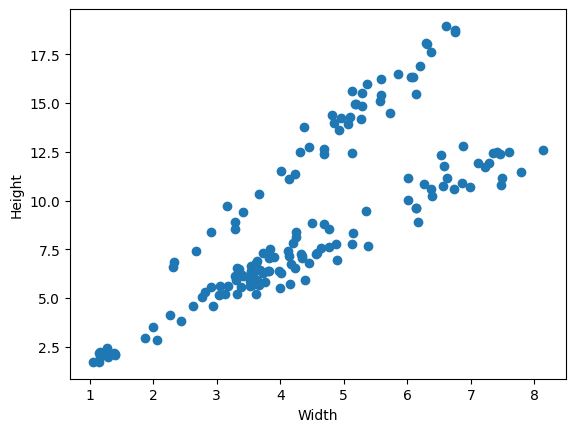

In [13]:
import matplotlib.pyplot as plt

# 1.
plt.scatter(df['Width'], df['Height'])

# Extra: Achsenbeschriftung (Plots sollten generell immer eine Achsenbeschriftung haben)
plt.xlabel('Width')
plt.ylabel('Height')

plt.show()

2\.
Man sieht einen Zusammenhang: Wenn die Breite des Fischs grösser wird, wird tendenziell auch die Höhe des Fisches grösser.
Es scheint unterschiedliche Gruppen zu geben, wahrscheinlich liegt dies an den unterschiedlichen Fischarten, dies müsste man aber noch untersuchen und bestätigen.

### Aufgabe 2.2 - Seaborn - ```sns.scatterplot```

1. Erstelle den selben Scatterplot von Aufgabe 2.1 nun mittels `seaborn` mittels `sns.scatterplot`. Anders als bei matplotlib geben wir bei `seaborn` immer das ganze DataFrame als `data` Parameter herein und geben die Achsen mittels Featurenamen mit den Parametern `x` und `y` an.
2. Nutze den `hue` Parameter von `sns.scatterplot`, um die Punkte mit der jeweiligen Spezies (`Species`) einzufärben.

#### Hilfreichelinks:

* `sns.scatterplot`: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

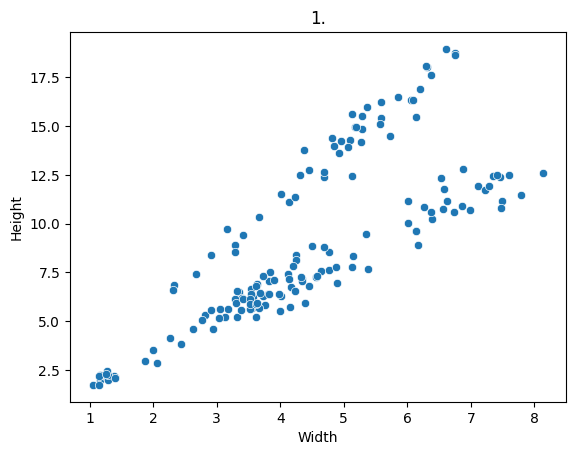

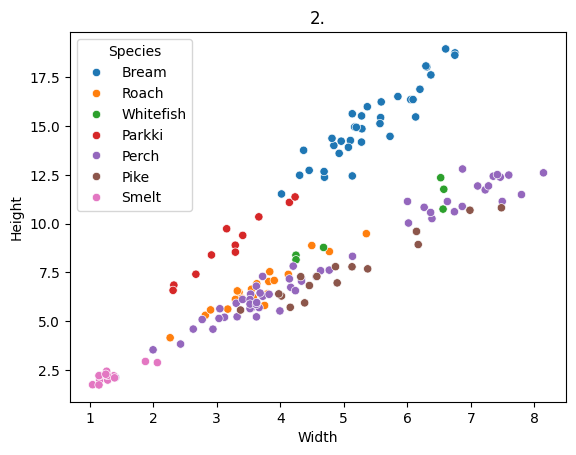

In [12]:
import seaborn as sns

# 1. data=df gibt unser DataFrame als Daten herein. Mit x='Width' und y='Height' geben wir an, dass Width die X-Achse und dass Height die Y-Achse sein soll.
plt.title('1.')
sns.scatterplot(data=df, x='Width', y='Height')
plt.show()
# Beachten Sie, dass seaborn uns gleich die Achsen beschreibt, im Matplotlib haben wir das in der Musterlösung manuell machen müssen.

# 2. Beachten Sie, dass matplotlib kein hue Parameter hat. wir müssten dies über mehrere plt.scatter Aufrufe selbst handhaben.
plt.title('2.')
sns.scatterplot(data=df, x='Width', y='Height', hue='Species')
plt.show()

### Aufgabe 2.3 - Seaborn - ```sns.countplot```

Oft möchten wir die Verteilung eines **diskreten Features** mittels einem `countplot` oder `histplot` anschauen.

1. Erstelle ein Histogram-Plot für die Species mittels `sns.countplot` (oder `sns.histplot`). Der Name des Feature, dass wir untersuchen wollen müssen wir in den `x` Parameter geben.
2. Was zeigt uns dieser Plot?

#### Hilfreichelinks:

* `sns.countplot`:
* `sns.histplot`: https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
# 1.
sns.countplot(data=df, x="Species")

2\.
Ein Histogram-Plot zeigt uns die Verteilung der Variable (hier Spezien).
Also wieviele Datenpunkte haben wir pro Spezien-Typ.
Wir sehen beispielsweise, dass wir wenige Datenpunkte für den `Whitefish` haben.

`histplot` kann stetige (mit `bins`) und diskrete Verteilungen handhaben, `countplot` kann diskrete Verteilungen handhaben.

### (Extra) Aufgabe 2.4 - Seaborn - `sns.boxplot`, `sns.violinplot`, `sns.pairplot`

Seaborn hat viele nützliche Plots out-of-the-box, wie:

1. `sns.boxplot` oder `sns.violinplot`: Zusammenhänge von einem numerischen Feature zu einem kategorischen Feature zu untersuchen.
2. `sns.pairplot`: Zusammenhänge von allen numerischen Features paar-weise zu untersuchen.
3. `sns.histplot`: Der `histplot` von Aufgabe 2.3 kann auch zwei Parameter `x` und `y` entgegennehmen.
4. `sns.kdeplot`: Plottet eine Verteilung anhand der gegeben Datenpunkte. Mit Vorsicht zu benutzen, da die dargestellte Verteilung eine Annäherung an die tatsächlichen Daten ist und allenfalls zu stark vereinfacht.
5. Weitere plots finden Sie hier**: https://seaborn.pydata.org/examples/index.html

Lesen Sie die Dokumentation zu den plots und erstellen Sie jeweils einen Plot für unseren Datensatz. Können Sie etwas Interessantes erkennen?

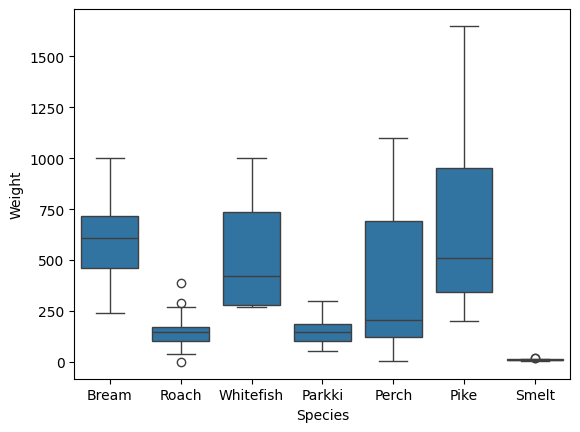

In [14]:
# 1.
sns.boxplot(data=df, x="Species", y="Weight")
plt.show()

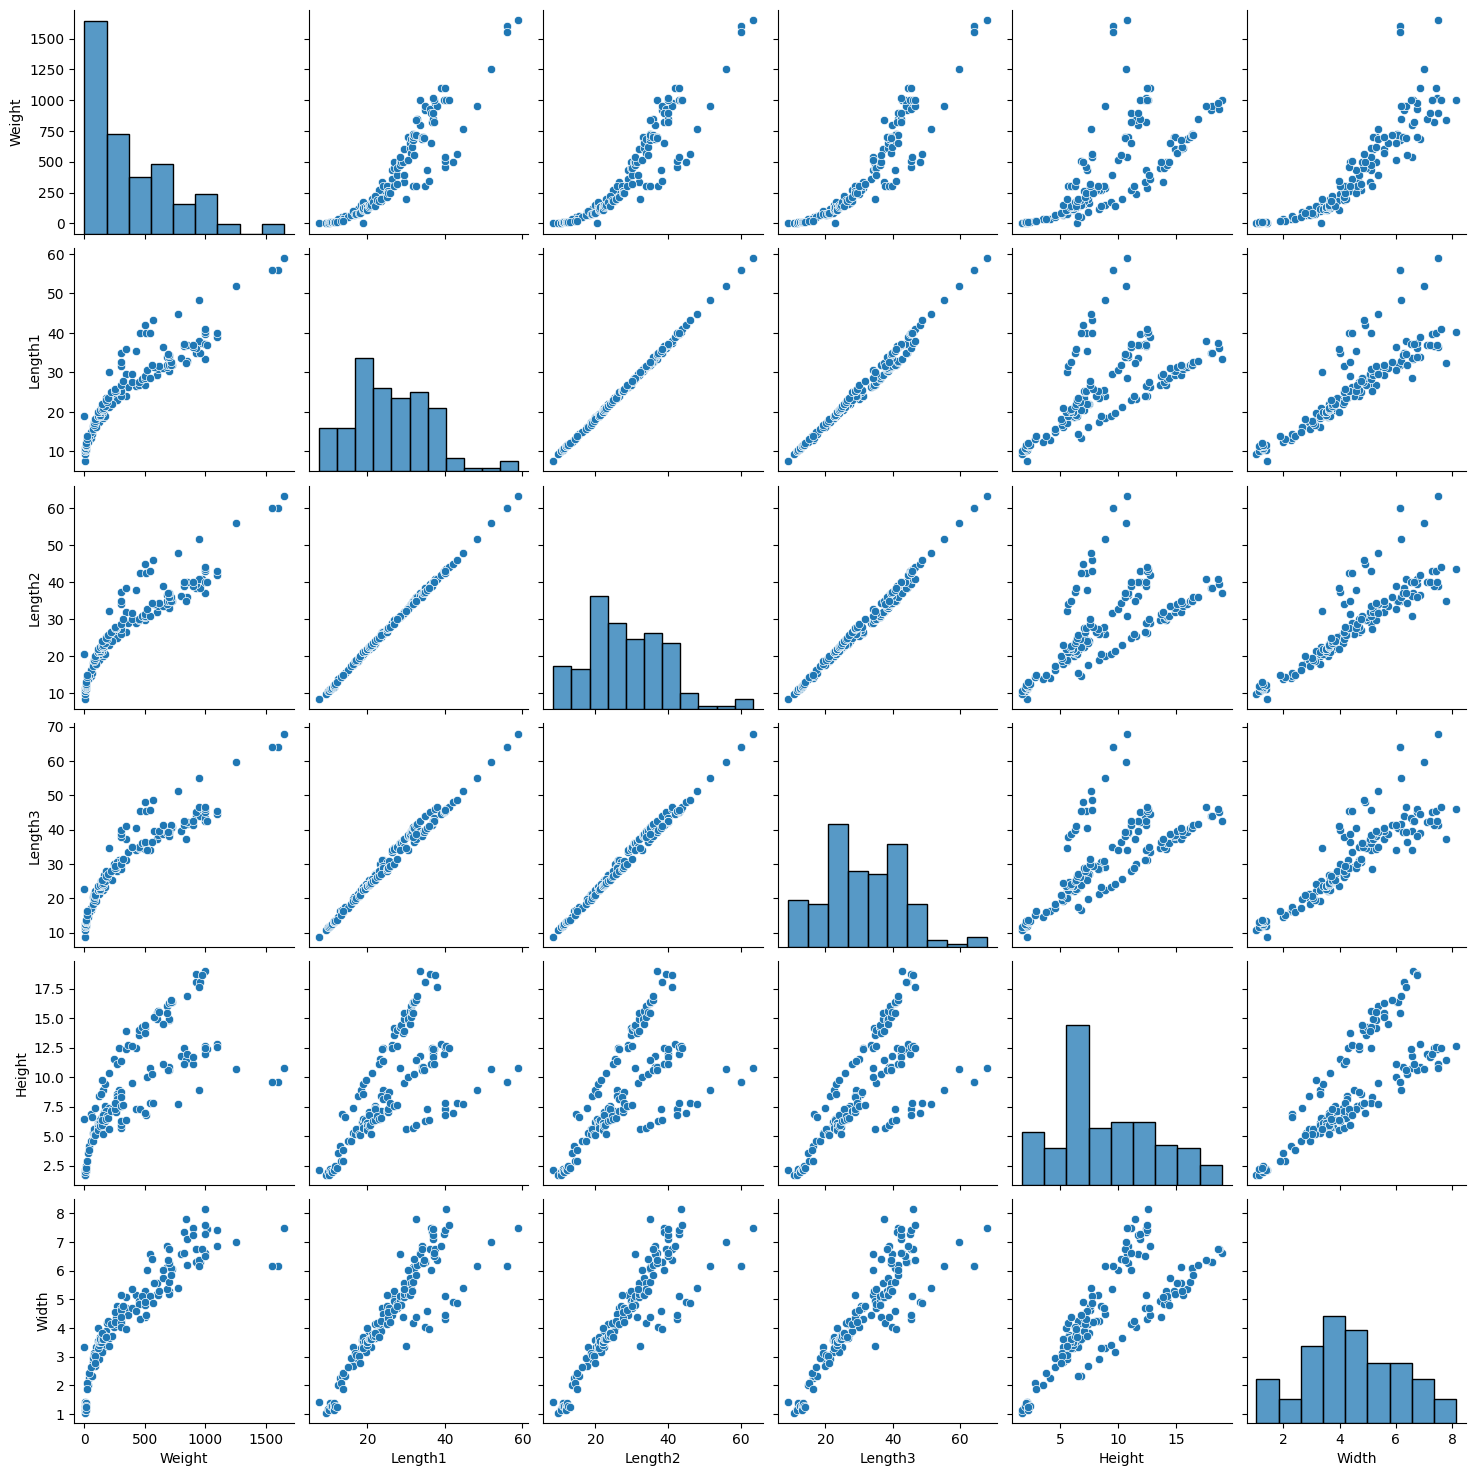

In [15]:
# 2.
sns.pairplot(data=df)
plt.show()

2\.
Viele numerische Features haben eine starke lineare Korrelation. Weight hat eine Quadratische Korrelation, was wahrscheinlich daher kommt, dass es abhängig vom Volumen des Fischen, also der Breite und der Höhe ist, welche ja bereits miteinander korrelieren.

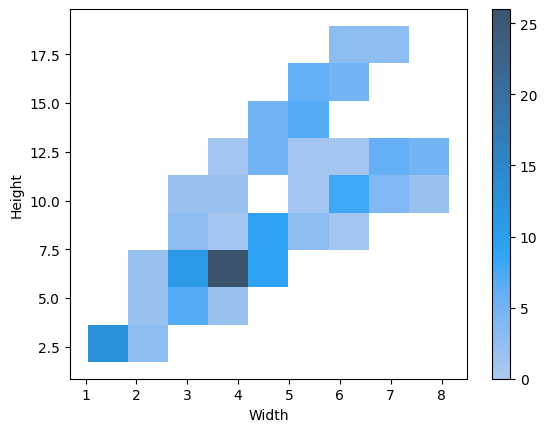

In [17]:
# 3.
sns.histplot(data=df, x='Width', y='Height', cbar=True)
plt.show()

3\.
Ein 2D-Histogram, die Achsen sind die 2 Features, die wir betrachten. 
Die Farbe zeigt wie viele Datenpunkte in ein Feld (`bin`) fallen. Mit cbar sehen wir noch was für ein Wert hinter solch einer Farbe steckt.
Hier beispielsweise haben wir ungefähr 25 Fische mit einer Breite (Width) von ungefähr 4 und einer Höhe (Height) von ungefähr 6.5.

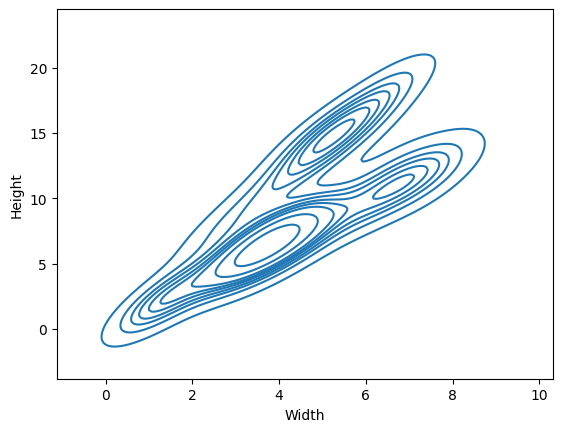

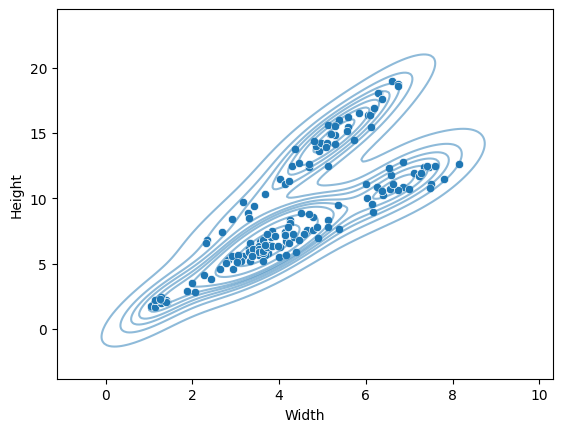

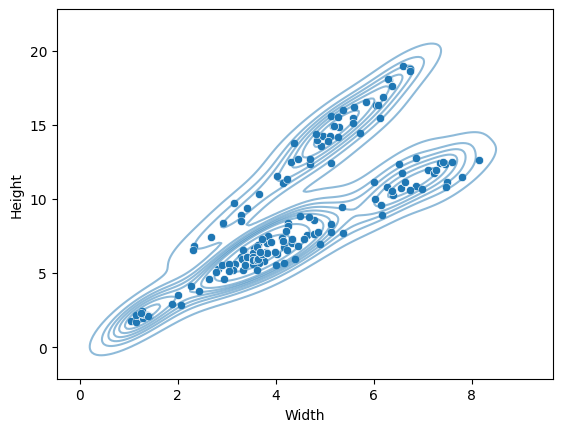

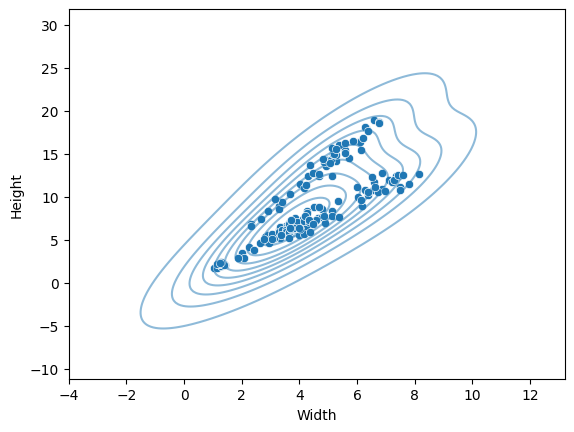

In [16]:
# 4.

# Die Verteilung entspricht der darunterliegenden Punktwolke mit dem Smoothing Parameter bw.
sns.kdeplot(data=df, x="Width", y="Height")
plt.show()

# Wir können die Punktwolke darunter plotten um den Zusammenhang zu sehen
sns.kdeplot(data=df, x="Width", y="Height", alpha=.5)
sns.scatterplot(data=df, x="Width", y="Height")
plt.show()

# Schrauben wir das Smoothing herunter, fasst die Verteilung mehr Sonderheiten der Punktwolke (neuer Modi bei den Smelt Punkten).
sns.kdeplot(data=df, x="Width", y="Height", alpha=.5, bw_method=0.3)
sns.scatterplot(data=df, x="Width", y="Height")
plt.show()

# Schrauben wir das Smoothing hoch, scheinen die Punkte von einer single Modi Verteilung zu kommen.
sns.kdeplot(data=df, x="Width", y="Height", alpha=.5, bw_method=1.0)
sns.scatterplot(data=df, x="Width", y="Height")
plt.show()

4\.
Die dargestellte Verteilung ist eine Multimodal-Verteilung (https://en.wikipedia.org/wiki/Multimodal_distribution)

## Schlusswort - Aufgabenblatt 1

Wir haben wichtige Funktionen für `pandas` und `seaborn` gelernt und haben ein wenig `matplotlib` angeschaut.

Nach diesen Aufgaben sollten Sie ein ungefähres Gefühl haben wie diese Programmier-Libraries funktionieren.

Die Erwartung von uns ist, dass Sie diese Aufgaben (Extra ausgeschlossen) gut lösen konnten.
Hatten Sie Probleme mit diesem Aufgabenblatt, sollten Sie dringend für das nächste Mal Ihre `python` und `pandas` Kenntnisse aufbessern.
Alle weiteren Aufgabenblätter werden Machine Learning anwenden, wo wir immer wieder auch auf `pandas` und `seaborn` treffen werden.